## Юнит 5. Основные алгоритмы машинного обучения. Часть I 
### Skillfactory: DSPR-19
### ML-4. Валидация данных и оценка модели 

#### План модуля:

- Разбиение выборки.
- Метрики качества.
- Underfitting и overfitting.
- Дисбаланс выборки.
- Визуализация процесса обучения.

### 4.2. Разбиение выборки


**Разбиение выборки** — это разделение имеющихся данных на несколько частей для проведения процессов обучения и валидации алгоритма МО так, чтобы оба процесса выполнялись на полностью независимых наборах данных.

**Какие бывают выборки:**

- Обучающая — подмножество данных, на котором мы обучаем модель.
- Валидационная — подмножество данных, на котором мы валидируем модель, то есть проверяем промежуточные результаты. Выборка нужна для проверки модели.
- Тестовая — подмножество данных, на котором мы тестируем модель после проверки всевозможных гипотез.

Обучаем на обучающей выборке: модель явно затачивается под обучающую выборку. Валидируем на валидационной и подкручиваем параметры модели: модель неявно затачивается под валидационную выборку. Тестовая выборка имитирует тестирование модели в реальных условиях.

#### Почему не стоит обучать на всей выборке?
Основная цель для нас — это получить модель с хорошей прогностической способностью. Нам не столько важен результат предсказания на нашей выборке (так как на ней нам уже известны все значения признаков), сколько важно уметь предсказывать значения целевой переменной для объектов, которые мы будем исследовать в будущем.

#### Как разбить выборку
**сomplete CV** — полный скользящий контроль
В данном случае оценка строится по всем возможным разбиениям. Важно упомянуть этот метод, однако стоит понимать, что даже при малых размерах длины обучающей выборки число выборки очень большое, и это затрудняет практическое применение данного метода. Полный скользящий контроль используют в теоретических исследованиях или в тех случаях (довольно редких), когда удается вывести вычислительную формулу, позволяющую реализовать вычисления.

К примеру, для метода k ближайших соседней такая формула известна, об этом можно почитать тут. Но все же этот метод разбиения используется на практике крайне редко.

**hold-out** — отложенная выборка
Разбиваем выборку на обучающую, валидационную и, по желанию, на тестовую выборки. Обычно в соотношении 60/40 или 70/30, вместе с тестовой — 60/20/20 или 70/15/15.

Данный метод чаще всего применяется в случае больших датасетов в силу того, что требует значительно меньше вычислительных мощностей, чем другие методы.

Однако важно помнить, что оценка в этом методе сильно зависит от разбиения. Это плохо, так как оценка должна в первую очередь характеризовать сам алгоритм обучения, а не способ разбиения.

**k-fold — cross-validation**, перекрёстная валидация
Разбиваем выборку на k частей.
Повторяем k раз: обучаем на k-1 частях, валидируем на оставшейся части.
Усредняем значения метрики.
Позволяет сделать оценку качества более робастной — устойчивой к помехам.
Чаще всего k имеет значение 10 (или 5 в случае маленьких выборок).

**t×k-fold кросс-валидация**

Процедура выполняется t раз. Обучающая выборка случайным образом разбивается на k непересекающихся, одинаковых по объему частей. Производится k итераций. На каждой итерации происходит k-fold-разбиение.

По сути, такой тип валидации — это k-fold валидация, которая повторяется t раз. Такой способ контроля обладает всеми преимуществами k-fold-валидации, но при этом добавляется возможность увеличивать число разбиений.

**leave-one-out** — отложенный пример
Предельный случай k-fold, при котором k равняется размеру всей выборки:

Выбираем пример для валидации, обучаем на всех остальных.
Выбираем пример для валидации, который ещё не видели, возвращаемся в пункт 1.

Частный случай **leave-P-out**, при котором нужно перебрать все способы выбора P-элементов из выборки.  Большим недостатком данного метода является то, что он очень ресурсозатратен. Однако нельзя утверждать, что он вообще не используется. В некоторых методах обучения вычисление LOO получается заметно ускорить, и его использование становится возможным.

#### Проблемы при разбиении
- Обучение на тестовой выборке.
- В тренировочной и тестовой выборках оказываются данные разной природы.
Пример: при классификации автомобилей в тренировочную выборку попали примеры с одними типами двигателей, а в тестовую — с другими.
- В тренировочной и тестовой выборках оказываются примеры со схожими признаками.
Пример: при обучении модели предсказывают пол, разные фотографии одного и того же человека попадают в разные выборки.

### Реализация в Python
Для разбиения выборки в Python есть специальная функция test_train_split из библиотеки Scikit-learn:




In [1]:
from sklearn.model_selection import train_test_split

После этого мы должны обозначить нашу зависимую переменную (Y) и независимые (X) и с помощью этой функции создать обучающую и тестовую выборки:

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)


_train_size_ — аргумент, отвечающий за размер обучающей выборки (доля).

_random_state_ является необязательным аргументом. Но дело в том, что разбиение каждый раз будет разным. Если задать явным образом значение random_state, то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом запуске алгоритма.

Для кросс-валидации также есть специальные функции. Например, ниже пример k-fold c двумя разбиениями на двух фолдах:

In [ ]:
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)  #реализация разбиения
kf.get_n_splits(X) #возвращает количество разбиений
kf.split(X) #возвращает индексы для разбиения

### 4.3. Практика


### 1. Разбиение выборки
**Разбиение выборки** - это разделение имеющихся данных на несколько частей для проведения процессов обучения и валидации алгоритма машинного обучения таким образом, чтобы оба процесса выполнялись на полностью независимых наборах данных (чтобы при валидации алгоритм работал с полностью незнакомыми данными той же структуры, что и обучающий набор данных).

### Какие бывают выборки
- [Тренировочная выборка](https://developers.google.com/machine-learning/glossary/#training_set) - подмножество данных, на котором тренируется модель
- [Валидационная выборка](https://developers.google.com/machine-learning/glossary/#validation_set) - подмножество данных, на котором модель настраивается ("тюнится", подгоняются параметры)
- [Тестовая выборка](https://developers.google.com/machine-learning/glossary/#test_set) - подмножество данных, на котором тестируется модель после проверки всех возможных гипотез по улучшению модели

### Способы разбиения выборки

1. **hold-out** (отложенная выборка)
1. **k-fold** (cross-validation, перекрестная валидация)
1. **leave-one-out** (отложенный пример)

**hold-out** разбиение — исходная выборка разбивается на обучающую и валидационную (+ опционально на тестовую) части в некотором соотношении.

Крайне рекомендуемая практика — разбивать выборку на **train/valid/test**. Причина выделения независимой тестовой выборки в том, что она не затрагивается до момента разворачивания алгоритма в сервисе и, соответственно, не используется при настройке параметров алгоритма. Тестирование в таком случае происходит честным путем — полученная на тестовой выборке метрика будет максимально близка к фактически посчитанной метрике в "боевых условиях".

Мы в дальнейшем будем разбивать выборку на train/valid для упрощения разбора материала.  

В каком соотношении делать разбиение?
Обычно **на валидационную выборку выделяют по 20-40% данных**. При выделении дополнительно тестовой выборки разбиение можно провести в соотношении **60/20/20%, либо 70/15/15%**. Реальные доли определяются исходя из наличия данных.

Для примера возьмем известный датасет ирисов. Скачать: https://archive.ics.uci.edu/ml/datasets/iris

<img src="./pictures/1-2.jpeg" width="500" align="center">

[Источник изображения](https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342)

In [4]:
import pandas as pd

In [6]:
iris_data = pd.read_csv('./data/iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [7]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


У нас есть четыре признака, относящиеся к размерам цветка, и классы. На первом этапе мы разобьём выборку на две части: тренировочную и валидационную, а позже рассмотрим, как добавить тестовую. Воспользуемся методом train_test_split() из библиотеки sklearn.

Разобьем исходную выборку на две части: тренировочную и валидационную, используя scikit-learn метод [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

In [10]:
print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


Теперь визуализируем наше разбиение с помощью специального метода:



In [11]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [12]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

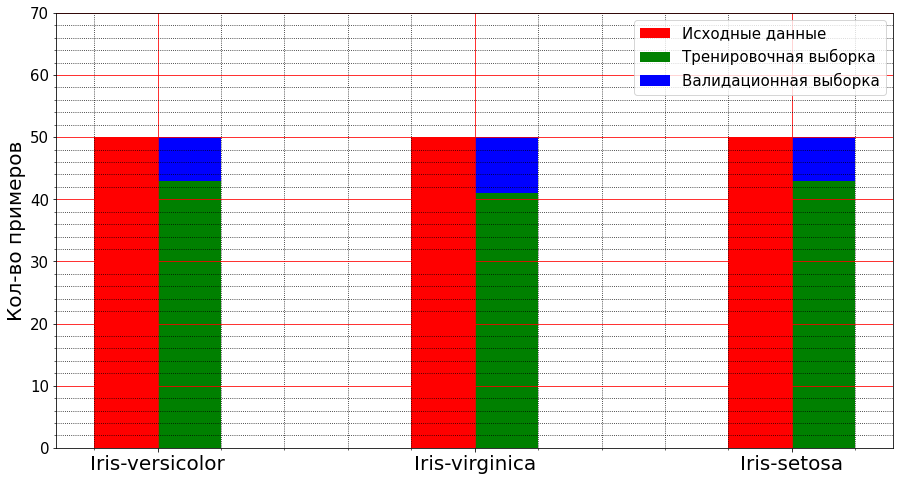

In [13]:
visualize_train_valid_counts(iris_data, train, valid)

По bar chart выше видно, что количество примеров каждого класса в тренировочной (или валидационной) выборке не совпадает. Это происходит потому, что мы разбили выборку без учета долей классов. Принцип, при котором данные разбиваются с учетом долей классов, называется **stratified** разбиение (стратифицированное разбиение).  
Для того чтобы сделать стратифицированное разбиение воспользуемся методом [StratifiedShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) из библиотеки scikit-learn:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

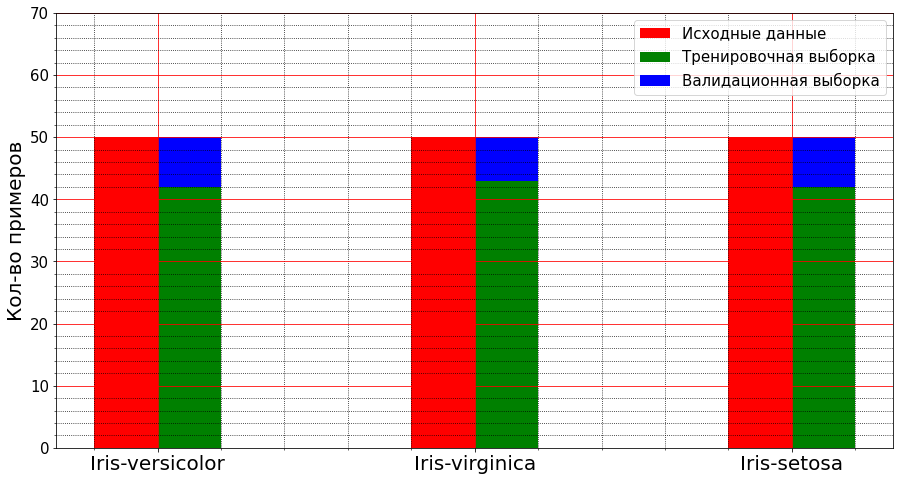

In [16]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

#### 1.2. Разбиение на train/valid/test
Как разбить выборку на три части? Определить размер выборок и поделить дважды: сначала на тренировочную и остальное, затем остальное на валидационную и тестовую:

In [17]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

In [18]:
print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\n\
Размер валидационной выборки: {}\nРазмер тестовой выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape, test.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (106, 5)
Размер валидационной выборки: (22, 5)
Размер тестовой выборки: (22, 5)


### 1.3. k-fold разбиение
[**Перекрестная проверка**](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B5%D0%BA%D1%80%D1%91%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0) (k-fold разбиение, скользящий контроль) — метод оценки поведения алгоритма на независимых данных, при котором исходная выборка разбивается на $k$ частей, на $k-1$ из которых производится обучение, а на $1$ валидация. В результате получается оценка эффективности выбранной модели с наиболее равномерным использованием имеющихся данных.

Сделаем k-fold разбиение данных, используя scikit-learn класс [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html):

In [19]:
from sklearn.model_selection import KFold

In [20]:
# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

In [21]:
for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

### 1.4. leave-one-out разбиение
**leave-one-out** разбиение — разбиение, при котором в качестве обучающей выборки рассматриваются $n-1$ пример, а в качестве валидационной $1$ пример из исходной выборки.

Сделаем leave-one-out разбиение 5-ти примеров из исходных данных с помощью scikit-learn класса [LeaveOneOut](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html):

In [22]:
from sklearn.model_selection import LeaveOneOut

In [23]:
loo = LeaveOneOut()

In [24]:
for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


Leave-one-out разбиение это частный случай [Leave-P-out](https://en.wikipedia.org/wiki/Cross-validation_(statistics%29) разбиения, при котором составляются комбинации из $p$ примеров исходных данных. Количество всевозможных комбинаций при таком разбиении составляет $C^p_n$ (или$\binom{n}{p}$), что вынуждает отказаться от использования этого метода при средних и больших объемах данных.  
В `sklearn` метод находится здесь: `sklearn.model_selection.LeavePOut`

### Задание 4.3.1
Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака payment_amount и запишите его в переменную result. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [25]:
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [26]:
vis_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [27]:
train, test = train_test_split(vis_data, test_size=0.3, shuffle=False)
result = test["payment_amount"].mean()

In [28]:
# проверка кода
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
train, test = train_test_split(vis_data, test_size=0.3, shuffle=False)
result = test["payment_amount"].mean()

### 4.4. Метрики качества регрессии
### 4.5. Практика
#### 2. Метрики качества
#### 2.1. Loss function

Самой базовой метрикой качества алгоритма является функция ошибки, т.е. функция минимизируемого функционала. Например, в задаче регрессии это может быть **сумма квадратов разностей** ([Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)), которая представляется формулой:
$$
MSE=\frac{1}{n}\sum_{i=1}^{n}({Y_i-\hat{Y}_i})^2,
$$
где $n$ — количество примеров, $Y_i$ — истинные значения, $\hat{Y_i}$ — предсказанные моделью значения.

В задачах классификации часто применяется ошибка **перекрестная энтропия** ([Cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression)), которая в случае бинарной классификации (**binary cross-entropy**) выглядит следующим образом:
$$
-\frac{1}{n}\sum_{i=1}^{n}{\lbrack(Y_i*log(\hat{Y}_i) + (1-Y_i)*log(1-\hat{Y}_i)\rbrack}
$$


Для классификации на произвольное количество классов используется функция ошибки в общем виде:
$$
-\frac{1}{n}\sum_{i=1}^{n}{\sum_{c=1}^{C}{Y_i^c*log(\hat{Y}_i^c)}},
$$
где $C$ — количество классов в задаче.

Поговорим о метриках качества, самая базовая из которых — **функция ошибки Loss function**. Посчитаем значение ошибки для случайно предсказанных классов. Нашим алгоритмом будет монетка с тремя гранями, которая пытается угадать класс ириса.

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

iris_data = pd.read_csv('data/iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [30]:
# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

In [31]:
# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

In [32]:
# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

In [33]:
# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

In [34]:
from sklearn.metrics import log_loss

In [35]:
# Посчитаем значение ошибки
log_loss(y, y_hat)

22.335075403849284

Одно значение ошибки мало о чем говорит. Функции ошибки не всегда читаются напрямую, а имеют смысл при просмотре в сравнении: при хорошей сходимости алгоритма ошибка должна существенно падать после очередной итерации обучения.

Для более понятных человеку результатов рассмотрим класс популярных метрик, относящихся к бинарной классификации.

Для подсчета метрик возьмем искусственную задачу, где определим истинные классы следующим образом:

In [36]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

In [37]:
from scipy import stats

In [38]:
# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0]


#### 2.2. Accuracy

**Accuracy** (точность) — самая базовая метрика для определения точности алгоритма, которая подсчитывает количество правильно предсказанных объектов к общему числу объектов.

#### Введем следующие понятия для формального определения метрик:  
**True positives (TP)** — кол-во правильно предсказанных примеров положительного класса  
**True negatives (TN)** — кол-во правильно предсказанных примеров отрицательного класса  
**False positives (FP)** — кол-во неправильно предсказанных примеров положительного класса (ложных срабатываний)  
**False negatives (FN)** — кол-во неправильно предсказанных примеров отрицательного класса (ложных отрицаний)  
__Positives (P)__ - общее кол-во примеров положительного класса  
**Negatives (N)** - общее кол-во примеров отрицательного класса

Тогда формально метрика accuracy выразится следующим образом:
$$
accuracy = \frac{TP+TN}{Positive+Negative}
$$

In [39]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = (TP + TN) / (P + N)
    
    return acc, TP, TN, P, N

Возьмем предсказания двугранной монетки для нашей выборки:

In [40]:
y_pred = np.array([monetka(2) for _ in range(n)])

Посчитаем значение accuracy:

In [41]:
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc * 100))

TP = 10
TN = 37
P = 14
N = 86
acc = 47.0%


То же самое можно сделать с помощью функции [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) библиотеки scikit-learn:

In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print('Accuracy from scikit-learn: {}%'.format(acc * 100))

Accuracy from scikit-learn: 47.0%


Наш алгоритм работает с точностью 50% (может отличаться от запуска к запуску). Совсем неплохо для случайной монетки. Но давайте попробуем улучшить результат. Мы же знаем, что наша выборка приблизительно на 90% состоит из примеров отрицательного класса. Тогда пусть наша монетка будет однобокой и всегда будет выдавать 0 в качестве ответа:

In [43]:
y_pred = np.zeros(n)

In [44]:
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc * 100))

TP = 0
TN = 86
P = 14
N = 86
acc = 86.0%


Почти 90%! Монетка стала предсказывать еще лучше.  
На самом деле монетка предсказывает только один класс, абсолютно игнорируя второй. В этом и есть главная проблема метрики accuracy: если выборка содержит разное количество примеров каждого класса, то добиться высокой точности можно даже просто не предсказывая редкие классы.  

Для таких несбалансированных выборок accuracy не может являться ключевой метрикой. Далее мы рассмотрим метрики, с помощью которых можно избежать дизбаланса классов, такие как precision, recall и F1-score.

#### 2.3. precision и recall

**precision** — метрика, измеряющая, насколько много из принятых моделью положительных объектов в действительности являются положительными.  
**recall** — метрика, измеряющая, насколько много положительных объектов из всех положительных объектов модель выбрала.

Интересный факт про обе метрики заключается в том, что при возрастании одной общей тенденцией второй является падение. В некотором смысле они противоположны. 

Посчитаем метрики precision и recall для нашей задачи с помощью методов [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) и [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) библиотеки scikit-learn:

In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.14
recall: 1.00


Полученные значения метрик говорят, что алгоритм никогда не назначает объектам положительный класс. Тут мы его и поймали. А теперь подумайте, что бы случилось, если положительным классом было наличие раковой болезни человека — модель бы не нашла рак ни у одного пациента!

Вернемся к случаю, где модель выбирает положительный и отрицательный классы с равной вероятностью:

In [47]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.00
recall: 0.00


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision в данном случае говорит, что из тех объектов, которые модель считает положительными, в действительности очень мало положительных. recall говорит, что модель хотя бы какой-то относительно неплохой процент положительных объектов все-таки находит. По двум числам трудно оценивать модель, поэтому были придуманы объединяющие метрики, такие как F1-score.

#### 2.4. F1-score

**F1-score** — метрика, объединяющая precision и recall, принимающая во внимание, что и та, и другая важны для задачи.

.
$$
F1\_score = \frac{2*precision*recall}{precision+recall}
$$


Вообще говоря, метрика F1-score является частным случаем метрики F-beta score, о которой вы можете прочитать [здесь](https://en.wikipedia.org/wiki/F1_score#Definition).

Посчитаем F1-score для нашей задачи с помощью метода [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) библиотеки scikit-learn:

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1 = f1_score(y_true, y_pred)
print('F1-score: {:.2f}'.format(f1))

F1-score: 0.00


Чем выше значение F1-score, тем лучше. Как видим, наш алгоритм работает неудовлетворительно.  
И это неудивительно, что неудовлетворительно.

#### 2.5. precision-recall curve

**precision-recall curve** показывает зависимость precision от recall, т.е. насколько точно алгоритм выбирает положительные объекты при изменении его чувствительности к положительному классу.

Посчитаем precision-recall curve, используя метод [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) библиотеки scikit-learn:

In [50]:
from sklearn.metrics import precision_recall_curve

In [51]:
precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

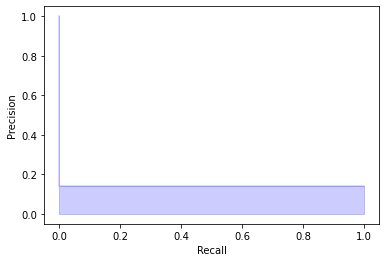

In [52]:
plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
plt.xlabel('Recall');
plt.ylabel('Precision');

Еще одной обобщающей характеристикой precision и recall является **average precision (AP)**, которая вычисляется как взвешенное среднее значений precision:
$$
AP = \sum_{n}{(R_n - R_{n-1})P_n},
$$
где $P_n$ и $R_n$ — precision и recall при $n$-ом отсечении. В некотором приближении значение AP есть значение иной характеристики, называемой **area under curve (AUC)** (площадь под кривой), являющейся важной метрикой при разработке классификаторов и детекторов.

Вычислим AP, используя метод [average_precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) библиотеки scikit-learn:

In [53]:
from sklearn.metrics import average_precision_score

In [54]:
ap = average_precision_score(y_true, y_pred)
print('Average Precision (AP) = {:.2f}'.format(ap))

Average Precision (AP) = 0.14


#### 2.6. Confusion matrix

[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) — матрица, в строках которой отображено число примеров, предсказанных в определенном классе, а в столбцах число примеров, которые в самом деле принадлежат каждому классу (и наоборот). С помощью confusion matrix можно удобно смотреть, в какую сторону отклоняются предсказания алгоритма при виде объектов определенного класса.



Вернемся к задаче с ирисами и посчитаем confusion matrix с помощью метода [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) библиотеки scikit-learn:

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y_true = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])

In [57]:
conf_mat = confusion_matrix(y_true, y_pred).T
print('Confusion matrix:\n{}'.format(conf_mat))

Confusion matrix:
[[20 19 13]
 [13 17 18]
 [17 14 19]]


Нарисуем confusion matrix так, чтобы было понятнее, что происходит:

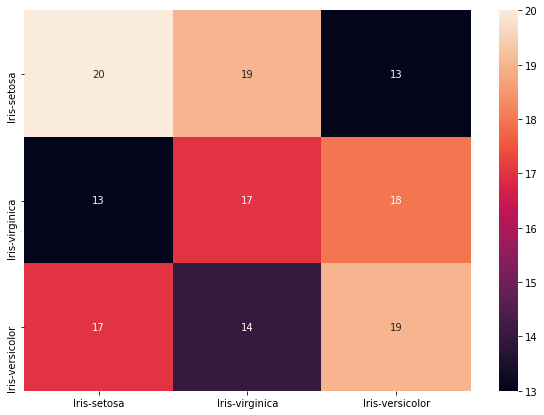

In [58]:
import seaborn as sn
class_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True);

### Задание 4.5.1
Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', затем избавьтесь от пропусков. Целевой переменной будет 'balance_due', разделите данные на обучающую и тестовую выборки в соотношении 70% / 30% без перемешивания. Обучите линейную регрессию из scikit-learn и запишите в переменную result значение метрики RMSE на тестовой выборке. RMSE означает Rooted Mean Squared Error. Rooted означает, что из значения метрики был взят корень.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [60]:
df = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
df.dropna(inplace=True)
X = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = df['balance_due']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
result = mean_squared_error(y_test,y_pred)**0.5

<ipython-input-60-8c991867740f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [62]:
# проверка кода
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv('train.csv', encoding = 'ISO-8859-1', low_memory = False)

df = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
df.dropna(inplace=True)
X = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = df['balance_due']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
result = mean_squared_error(y_test,y_pred)**0.5

<ipython-input-62-be87d3705ebb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [63]:
result

132.080334458986

### 4.6. Метрики качества классификации


#### Confusion matrix


<img src="./pictures/7.4_2.png" width="500" align="center">

Все рассмотренные метрики реализованы в Python:

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

### Задание 4.6.7
На этапе вычисления метрик вы получили результаты precision = 0.75 и recall = 0.6. Посчитайте значение метрики $f1$. Округлите до сотых и запишите результат.

In [2]:
precision = 0.75
recall = 0.6

f1 = 2*precision*recall/(precision + recall)
print(f"f1 = {round(f1,2)}")

f1 = 0.67


### Задание 4.6.8
Допустим, у вас есть выборки y_true = \[0, 0, 1, 1, 1, 1, 0, 1\] и y_pred = \[0, 1, 0, 0, 1, 1, 0, 1\]. Посчитайте значение метрики $f1$. Округлите до сотых и запишите результат.

In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

f1 = f1_score(y_true,y_pred)
print(f"f1 = {round(f1,2)}")

f1 = 0.67


### Задание 4.6.9
Допустим, у вас есть выборки y_true = \[0, 0, 1, 0, 0, 1, 0\] и y_pred = \[1, 1, 1, 0, 1, 1, 0\]. Посчитайте значение метрики $precision$. Округлите до сотых и запишите результат.

In [4]:
y_true = [0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]

precision = precision_score(y_true,y_pred)
print(f"precision = {round(precision,2)}")

precision = 0.4


### Задание 4.6.10
Допустим, у вас есть выборки y_true = \[0, 0, 1, 0, 0, 1, 0\] и y_pred = \[1, 1, 1, 0, 1, 1, 0\]. Посчитайте значение метрики $recall$. Округлите до сотых и запишите результат.

In [5]:
y_true = [0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]

recall = recall_score (y_true,y_pred)
print(f"recall = {round(recall,2)}")

recall = 1.0


### 4.7. Практика для метрик классификации


#### Предварительное описание к заданию:
Реализуем бинарную классификацию записей голосов (мужских и женских) на основе характеристик записей их разговоров.  

Описание датасэта - **params_recording_men_and_women** - характеристик записей  разговоров мужчин и женщин:  
1. meanfreq: средняя частота голоса (в кГц)  
2. sd: стандартное отклонение частоты голоса  
3. median: медианная частота (в кГц)  
4. Q25: значение в первом квартиле (в кГц)  
5. Q75: значение в третьем квартиле (в кГц)  
6. IQR: интерквартильный размах (в кГц)  
7. skew: ассиметрия  
8. kurt: эксцесс  
9. sp.ent: спектральная энтропия  
10. sfm: энтропия Винера  
11. mode: мода частоты  
12. centroid: частотный центроид  
13. meanfun: средняя основная частота, измеренная по акустическому сигналу  
14. minfun:  минимальная основная частота, измеренная по акустическому сигналу  
15. maxfun: максимальная основная частота, измеренная в акустическом сигнале  
16. meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу  
17. mindom: минимум доминирующей частоты, измеренной в акустическом сигнале  
18. maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале  
19. dfrange: диапазон доминантных частот, измеренное на звуковой сигнал  
20. modindx: индекс модуляции голоса  

Попробуйте построить модель, предсказывающую пол обладателя записи голоса.  
Для этого:  
- Разделите выборку на обучающую и тренировочную с параметрами test_size=0.3, random_state=42  
- Нормализуйте признаки с помощью функции StandardScaler(). Для обучающей и тестовой выборки по отдельности!  
- Обучите модель логистической регрессии на подготовленных данных.

### Задание 4.7.1
Вычислите значение метрики  и введите полученное значение $accuracy$. *Запишите ответ в формате трех знаков после запятой (не округляя).*

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('voiceDataSet.csv')

# обратите внимание в целевом столбце не числовые значения
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(columns='label')
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)

print(f"accuracy = {int(accuracy*1000)/1000}")

accuracy = 0.973


### Предварительное описание к заданию:  
Теперь познакомимся с новым алгоритмом классификации, а также снова потренируемся делить выборку и осуществлять кросс-валидацию. Кроме того, посмотрим, как можно оценить качество классификации для случая, когда наша классификация не бинарная, т.е. у нас несколько классов.  
В этом кейсе мы попробуем определять типы стекла по его характеристикам.  

Описание датасета - **content_chem_elem_in_diff_types_glass**: в первых столбцах показатели содержания различных веществ в стекле, а в последнем (Type) — непосредственно тип стекла

### Задание 4.7.2
Сколько классов стекла представлено в этой задаче?

In [5]:
df = pd.read_csv('glass.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df['Type'].nunique()

6

Итак, мы выяснили, сколько у нас классов и узнали, что в этот раз у нас будет не бинарная классификация. А значит, мы не сможем использовать некоторые метрики качества (например, $precision$ и $recall$).  
Приступим непосредственно к построению модели. На примере этой задачи мы узнаем новый алгоритм kNN (метод ближайших соседей). Это один из простейших методов классификации.  
Его называют ленивым классификатором, потому что во время обучения модели он ничего не делает, просто считывает и сохраняет тренировочные данные. Сама классификация для него начинается тогда, когда ему дают тестовые данные. Тогда kNN проходит два базовых шага:  
1. Сначала он ищет k ближайших размеченных точек данных – эти точки и называют k ближайшими соседями.  
2. Затем, используя классы соседей, kNN решает, как лучше классифицировать новые данные. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

X = df.drop(columns='Type')
y = df.Type

model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf, scoring="accuracy")

array([0.44186047, 0.65116279, 0.3255814 , 0.34883721, 0.07142857])

Если мы посмотрим на результаты классификации, то увидим достаточно большой разброс значений точности, а также в целом невысокие значения.

Это произошло в силу очень маленькой выборки в условиях большого количества классов (6 классов и около 200 наблюдений — крайне мало для получения высокого качества модели). Также плохой результат возможен по причине использования довольно простого алгоритма.

### Задание 4.7.3
Измените количество разбиений на 10. Вычислите среднее значение метрики $accuracy$ по 10 разбиениям и введите ниже, *округлите до сотых*.

In [8]:
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)
cross_val_sc = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

temp = cross_val_sc.mean()

print(f"Среднее значение метрики accuracy по 10 разбиениям = {round(temp,2)}")

Среднее значение метрики accuracy по 10 разбиениям = 0.53


### Предварительное описание к заданию:  
В следующей задаче мы будем диагностировать болезни сердца по различным медицинским параметрам пациентов.   

Избавьтесь от выбросов, чтобы они не ухудшили качество нашей модели. Для того, чтобы избавиться от выбросов, уберите все данные, значения признаков которых отстают от первого или третьего квартиля более, чем на 1.5 межквартильного размаха.

### Задание 4.7.4
Сколько наблюдений осталось после удаления выбросов?

In [9]:
df = pd.read_csv('heart_fin1.csv', sep=';')

# функция определения левой и правой границы выбросов
def borders_outliers(d_df, d_column):
    Q1 = d_df[d_column].quantile(0.25)
    Q3 = d_df[d_column].quantile(0.75)
    IQR = Q3 - Q1
    border_left = Q1 - 1.5 * IQR
    border_right = Q3 + 1.5 * IQR
    return border_left,border_right

temp0 = df.shape

for col in df.columns:
    border_left,border_right = borders_outliers(df, col)
    df = df.loc[df[col].between(border_left,border_right)]

temp1 = df.shape

print(f"Кол-во строк ПОСЛЕ удаления выбросов = {temp1[0]}")
print()
print(f"Для информации: кол-во строк до удаления выбросов = {temp0[0]}")

Кол-во строк ПОСЛЕ удаления выбросов = 284

Для информации: кол-во строк до удаления выбросов = 303


### Предварительное описание к заданию:  
Теперь разбейте выборку на тестовую и обучающую с параметрами test_size=0.15, random_state=5.  
Обучите модели логистической регрессии ( c параметром max_iter=1000) и KNN (с количеством соседей, равным 3) на этих данных. Вычислите метрики качества.

### Задание 4.7.5
У какой модели выше значение ROC AUC?

In [12]:
from sklearn.metrics import roc_auc_score

X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred_reg = model1.predict(X_test)

model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)

roc_auc_Reg = roc_auc_score(y_test, y_pred_reg)
roc_auc_KNN = roc_auc_score(y_test, y_pred_knn)

temp0 = roc_auc_Reg
temp1 = roc_auc_KNN

print(f"roc_auc_Reg = {temp0}")
print(f"roc_auc_KNN = {temp1}")
print(f"Максимальный roc_auc у Логистической регрессии = {round(temp0,2)}")

roc_auc_Reg = 0.7651515151515152
roc_auc_KNN = 0.6233766233766235
Максимальный roc_auc у Логистической регрессии = 0.77


### 4.8. Underfitting и overfitting

**Недообучение (underfitting)** — проблема, при которой алгоритм недостаточно хорошо изучил данные и пропускает важные зависимости между признаками. В случае недообучения мы даже на обучающих данных не можем достичь приемлемых оценок для модели.

_Почему может возникать недообучение?_

- Неправильно подобранный алгоритм обучения
- Неадекватная функция ошибки
- Не настроены или неправильно настроены гиперпараметры

**Как избавиться от недообучения?**

- Усложнение модели.
- Ослабевание параметров регуляризации.

**Переобучение (overfitting)** — проблема, при которой алгоритм чувствителен к незначительным колебаниям в данных в процессе обучения. Из-за этого алгоритм выучивает обучающий набор данных.

_Как избавиться от переобучения_

- Отложенная выборка (hold-out).
- k-fold валидация или leave-one-out валидация.
- Уменьшение сложности модели.
- Регуляризация.
- Добавление данных.

### Задание 4.8.9
Часто мы считаем, что данные несбалансированны, если соотношение классов в задаче бинарной классификации равно 10 к 1 или больше. У вас есть выборка, в которой соотношение классов подходит под нижний порог критерия несбалансированности. При этом, у вас в выборке 1460 записей. Сколько при этом в выборке записей класса-меньшинства? Ответ округлите вверх, если это необходимо.

In [13]:
temp = 1460/11

print(f"{round(temp,0)}")

133.0


### 4.9. Практика


#### Основные моменты
Важной характеристикой алгоритма МО является **обобщающая способность** — способность использовать знания, полученные при обучении, на новых данных. Обобщающая способность часто страдает из-за недообучения и переобучения, чтобы исправить это, нужно решать дилемму **Bias-variance tradeoff**.

Когда мы говорим про переобучение, мы сталкиваемся с высокой вариативностью данных. При недообучении мы наблюдаем высокое смещение: алгоритм недостаточно изучил данные и пропустил зависимости. В теоретическом уроке мы уже говорили, как избавиться от переобучения и неодообучния.

Рассмотрим пример обучения дерева решений с датасетом Титаника.

В качестве алгоритма возьмем один из методов классификации, который будет рассмотрен далее — **решающее дерево**. По сути, дерево решений — это метод представления решающих правил в иерархической структуре. Например, дерево решений для задачи кредитного скоринга будет выглядеть следующим образом:

<img src="./pictures/ml-7-9-1.jpg" width="500" align="center">

Более подробно мы разберем этот метод далее, а пока давайте попробуем применить этот алгоритм на практике. На данный момент для нас важнее аспекты валидации, поэтому тонкости метода не имеют значения.

In [15]:
from sklearn.tree import DecisionTreeClassifier

titanic = pd.read_csv('titanic.csv')
titanic.head()

# Заменить категориальный признак "Sex" на два признака "female" и "male" с бинарными значениями
sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)
# Отбросить имя человека из выборки
titanic = titanic.drop('Name', axis=1)
# Отделим target от признаков
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

Сделаем небольшую предобработку, разделим нашу выборку на несколько частей и обучим классификатор:

/home/dell/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


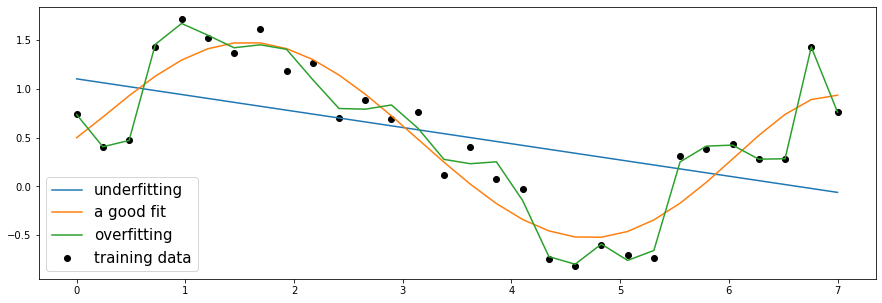

In [16]:
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

n_points = 30
x = np.linspace(0., 7., n_points)
y = np.sin(x) + np.random.rand(n_points)

plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='k', label='training data')

for degree, label in zip([1, 5, 30], ['underfitting', 'a good fit', 'overfitting']):
    polynomial_coef = np.polyfit(x, y, deg=degree)
    inter_poly = np.polynomial.Polynomial(polynomial_coef[::-1])
    plt.plot(x, inter_poly(x), label=label)
plt.legend(fontsize=15)

In [19]:
from sklearn.tree import DecisionTreeClassifier

titanic = pd.read_csv('titanic.csv')
display(titanic.head(2))

# Заменить категориальный признак "Sex" на два признака "female" и "male" с бинарными значениями
sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)
# Отбросить имя человека из выборки
titanic = titanic.drop('Name', axis=1)
# Отделим target от признаков
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


#### 7.9.1. Валидация на hold-out выборке

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

In [21]:
clf = DecisionTreeClassifier(random_state=456)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=456)

In [22]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred)
print('[train] F1-score = {:.2f}'.format(f1_train))

[train] F1-score = 0.98


In [23]:
y_pred = clf.predict(X_valid)
f1_val = f1_score(y_valid, y_pred)
print('[valid] F1-score = {:.2f}'.format(f1_val))

[valid] F1-score = 0.71


Как видим, точность при валидации значительно ниже точности при обучении. Проверим это дополнительно с помощью кросс-валидации:

#### 7.9.2. Кросс-валидация

In [24]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(random_state=456)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)

In [25]:
def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_valid, std_f1_valid = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print('[train] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_train, std_f1_train))
    print('[valid] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_valid, std_f1_valid))
    
    plt.figure(figsize=(15, 5))

    plt.plot(cv_metrics['train_score'], label='train', marker='.')
    plt.plot(cv_metrics['test_score'], label='valid', marker='.')

    plt.ylim([0., 1.]);
    plt.xlabel('CV iteration', fontsize=15)
    plt.ylabel('F1-score', fontsize=15)
    plt.legend(fontsize=15)

[train] F1-score = 0.98 +/- 0.00
[valid] F1-score = 0.78 +/- 0.04


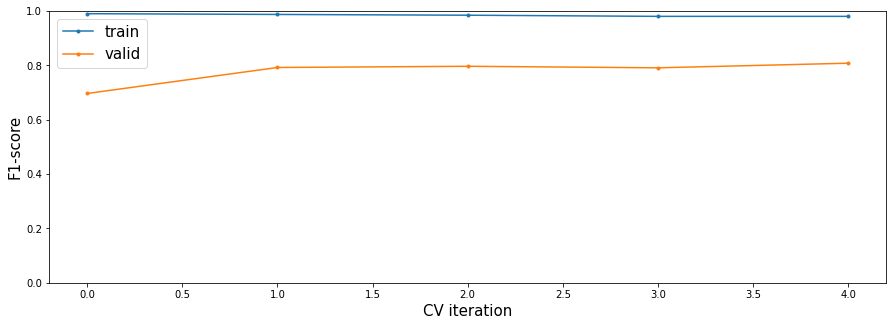

In [26]:
plot_cv_metrics(cv_metrics)

Гипотеза о переобучении подтвердилась. Попробуем избавиться от него, упростив модель — в данном случае ограничим глубину дерева:

[train] F1-score = 0.86 +/- 0.01
[valid] F1-score = 0.83 +/- 0.02


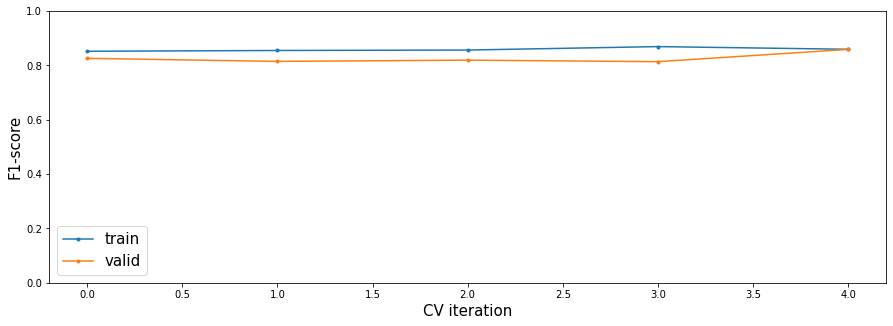

In [27]:
clf = DecisionTreeClassifier(max_depth=5, random_state=456)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)
plot_cv_metrics(cv_metrics)

Итак, метрики при обучении и валидации практически сравнялись, к тому же на валидации значение точности стало выше. Теперь возникает законный вопрос — а можно ли улучшить точность предсказаний? Вполне вероятно, что в данном случае присутствует проблема underfitting. Для ее решения можно заняться созданием новых признаков.

### Задание 7.9.1
Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков.  
Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.  
Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики $f1$ на тренировочной выборке и на тестовой выборке. Вычтите из значения метрики на тренировочной выборки значение метрики на тестовой выборке и запишите результат в переменную result.

***Ответ:***  
```python
df = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']]
df.dropna(inplace=True)
X = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
y = df['compliance']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False)

clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred)

y_pred = clf.predict(X_valid)
f1_val = f1_score(y_valid, y_pred)

result = f1_train-f1_val
```

Полный код:  
```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)

df = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']]
df.dropna(inplace=True)
X = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
y = df['compliance']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False)

clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred)

y_pred = clf.predict(X_valid)
f1_val = f1_score(y_valid, y_pred)

result = f1_train-f1_val
```

In [30]:
# проверка  кода

vis_data = pd.read_csv('train.csv', encoding = 'ISO-8859-1', low_memory = False)

df = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']]
df.dropna(inplace=True)
X = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
y = df['compliance']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False)

clf = DecisionTreeClassifier(random_state=456)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred)

y_pred = clf.predict(X_valid)
f1_val = f1_score(y_valid, y_pred)

result = f1_train-f1_val

<ipython-input-30-462dc2d65aea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


### Задание 4.9.2
Какой эффект вы обнаружили после обучения?

<ipython-input-33-912052a02129>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


[train] F1-score = 0.96 +/- 0.00
[valid] F1-score = 0.95 +/- 0.01


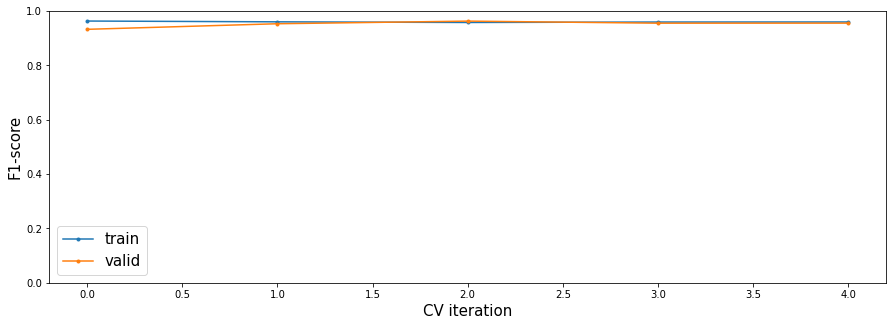

In [33]:
vis_data = pd.read_csv('train.csv', encoding = 'ISO-8859-1', low_memory = False)

df = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']]
df.dropna(inplace=True)
X = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
y = df['compliance']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=23)

clf = DecisionTreeClassifier(max_depth=10, random_state=23)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)

plot_cv_metrics(cv_metrics)

### 4.10. Дисбаланс выборки


**Несбалансированная выборка (imbalanced dataset)** — выборка, в которой примеров каких-то классов намного больше, чем других. В случае регрессии дисбалансом выборки будет ситуация, при которой распределение целевых значений будет сильно отличаться от равномерного.

_Что происходит при дисбалансе классов:_

- У алгоритма появляется склонность к более популярным классам/значениям.
- Нельзя использовать метрики, не учитывающие веса классов, пример — accuracy.

**Что делать:**

- Изменить целевую метрику — в задачах классификации precision, recall, F1-score будут корректнее описывать алгоритм, чем accuracy.
- Изменить выборку данных:  
**oversampling** — увеличение количества объектов классов-меньшинств.  
**undersampling** — сокращение количества объектов превалирующих классов.
- Добавить штраф в оптимизационный функционал, прямо пропорциональный количеству объектов каждого класса (веса классов).
- Возможно, есть смысл перейти к задачам **Anomaly detection** (поиск выбросов, шума и исключений)

### 4.11. Практика


### 4. Дисбаланс выборки
**Несбалансированная выборка (imbalanced dataset)** — выборка, в которой количество примеров каких-то классов сильно превалирует над количеством примеров других классов. Это определение также можно расширить на другие типы задач. Например, в задаче регрессии дисбалансом выборки будет ситуация, при которой распределение целевых значений будет сильно отличаться от равномерного.
### 4.1. Когда считать выборку несбалансированной?


In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


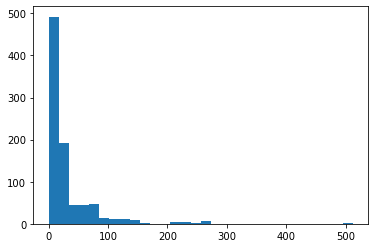

In [36]:
plt.hist(titanic['Fare'], bins=30);

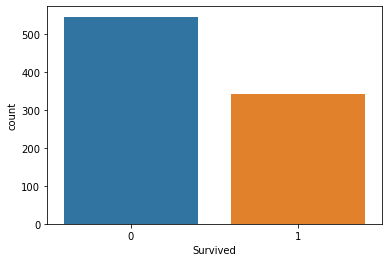

In [37]:
sns.countplot(x='Survived', data=titanic)

Нет точного определения, когда считать выборку несбалансированной. Неформально считается, что выборка несбалансированна, когда отношение количества преобладающего и минорного классов составляет 10:1.

### 4.2. Последствия дисбаланса данных
Что происходит при дисбалансе классов:
1. У алгоритма появляется склонность к более популярным классам/значениям.
1. Невозможность использования метрик, не учитывающих веса классов (базовая метрика accuracy, изученная выше, не может быть использована).

### 4.3. Решение проблемы
1. Изменить целевую метрику — в задачах классификации confusion matrix, precision, recall, F1-score, ROC-кривые будут намного корректнее описывать алгоритм, чем accuracy.
1. Изменить выборку данных: 1) oversampling — увеличение кол-ва объектов классов-меньшинств; 2) undersampling — сокращение кол-ва объектов превалирующих классов.
1. Добавить штраф в оптимизационный функционал, прямо пропорциональный кол-ву объектов каждого класса (веса классов).
1. Возможно, есть смысл перейти к задачам [Anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection) и [Change detection](https://en.wikipedia.org/wiki/Change_detection).

Во 2-м способе решение проблемы oversampling может быть выполнено как простым дублированием примеров меньшего класса, так и и более сложной техникой, называемой "аугментацией выборки".

**Аугментация выборки (data augmentation)** — процесс генерации примеров из исходных путем их модификации. Примерами аугментации данных могут служить: повороты, масштабирование изображений, применение фильтров; для текста может быть незначительно изменен контекст и изменено склонение/спряжение слов.

Еще одна техника, которая может быть использована для oversampling это **обогащение данных**. При использовании этой техники данные находятся во внешних дополнительных источниках. Например, если банк решает свою скоринговую задачу, он может также расширить свой набор данных данными другого банка при их наличии.

### Задание 4.11.1


1. Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков.  
2. Обучим модель на несбалансированных данных. Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.  
3. Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики  на тренировочной выборке и на тестовой выборке.  
4. Затем сделайте эту же выборку сбалансированной с помощью undersampling.  
Для этого посчитайте количество примеров (n) класса-меньшинства, затем из класса-большинства возьмите n первых примеров.  

То есть, в терминологии Python:  
- возьмите срез (slice) от начала и до n, где n — количество примеров класса, которого в выборке представлено меньше.  
- cоедините две части выборки (с уменьшенным классом-большинством и с изначальным классом-меньшинством),   
- сделайте точно такое же разбиение, как в задаче выше, и обучите такую же модель.  

Посчитайте значение метрики  на новой тестовой выборке с помощью новой модели. Вычтите из значения метрики на тестовой части сбалансированной выборки значение метрики на тестовой части несбалансированной выборки и запишите результат в переменную result.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score

vis_data = pd.read_csv('train.csv', encoding = 'ISO-8859-1')

columns = ['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']
df = vis_data[columns]
df.dropna(inplace=True)

X = df.drop(columns='compliance')
y = df.compliance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model = DecisionTreeClassifier(random_state=23)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
f1_full_test = f1_score(y_test, y_pred_test)
f1_full_train = f1_score(y_train, y_pred_train)

n = sum(df.compliance == 1)
compliance0 = df[df.compliance == 0][:n]
compliance1 = df[df.compliance == 1]
df1 = compliance0.append(compliance1)

X1 = df1.drop(columns='compliance')
y1 = df1.compliance

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, shuffle=False)

model = DecisionTreeClassifier(random_state=23)
model.fit(X1_train, y1_train)

y1_pred_test = model.predict(X1_test)
y1_pred_train = model.predict(X1_train)
f1_bal_test = f1_score(y1_test, y1_pred_test)
f1_bal_train = f1_score(y1_train, y1_pred_train)
result = f1_bal_test - f1_full_test

/home/dell/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-39-1d0331248264>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# Решение от автора курса:
vis_data_small = vis_data[['fine_amount', 'state_fee', 'late_fee', 
                           'discount_amount', 'balance_due', 'compliance']].dropna()
X = vis_data_small[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
y = vis_data_small['compliance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)
f1_imbalanced = f1_score(y_test, clf.predict(X_test))

zeros = y[y == 0.0]
ones = y[y == 1.0]
down_index = list(zeros.index[:len(ones)]) + list(ones.index)
X_down = X.ix[down_index, :]
y_down = y[down_index]
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.3, shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train, y_train)
f1_balanced = f1_score(y_test, clf.predict(X_test))

result = f1_balanced - f1_imbalanced  

### 4.12. Визуализация процесса обучения
**Визуализация** — полезный инструмент для отслеживания проблем в процессе обучения. Например, если график ошибки на валидации становится выше, чем график ошибки на обучении, то можно сказать, что модель переобучилась. 

В дальнейшем для визуализации вы можете использовать такие инструменты, как **TensorBoard** от _Google_. Это бесплатный инструмент, позволяющий в реальном времени смотреть на метрики обучения, показывать графики ошибок. С его помощью вы сможете сравнивать графики по разным моделям, чтобы получить представление о том, какая модель лучше или хуже справилась, и какие ошибки возникли на пути. 

### Задание 4.10.1
На какие графики мы обычно смотрим во время процесса обучения или после него?  
Ответ:
- Зависимость функции ошибки от эпохи обучения
- Зависимость метрики от эпохи обучения

### Задание 4.10.2
Какие величины обычно сравнивают на одном графике (в одном масштабе)?  
Ответ:
- Значение метрики на обучении и на валидации
- Значение функции ошибки на обучении и на валидации 

### Задание 4.10.3
Зачем на одном графике сравнивать значения функции ошибки на двух разных этапах построения модели?  
Ответ:
- Помогает обнаружить переобучение 


### Задание 4.10.4
Есть ли смысл сравнивать график функции ошибки для разных моделей?  
Ответ:
- Да, если функция ошибки не меняется 

### Задание 4.10.5
Обычно график метрики во время обучения выглядит как растущая кривая, выходящая на плато. При этом значение имеют скорость первоначального роста кривой и высота плато (среднее значение, которое принимает метрика на плато).

Перед вами две модели: одна быстро растёт, но высота плато 0.7, другая — медленно растёт, но высота плато 0.8. Какую модель вы выберете и в каком случае?  

Ответ:
- Первую, если вычислительных ресурсов мало и нет возможности тратить время на обучение
- Вторую, если нам важна точность модели и есть время на обучение

### 4.13. Готовимся к собеседованию
